In [1]:
import pygad
import numpy as np
import sys
import random

import matplotlib.pyplot as plt
from scipy.special import comb

import dataset
import bezier_spline

random.seed(0)

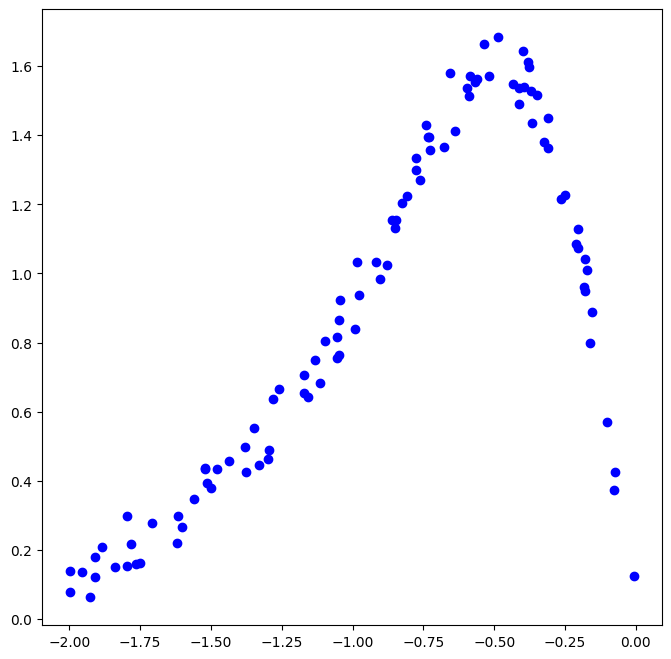

In [2]:
S = dataset.MagmanDataset()
S.sample(size=100, noise=0.1)
S.plot()

In [3]:
spline = bezier_spline.BezierCurve()
spline.fixnode(1, 'x', S.xl)
spline.fixnode(4, 'x', S.xu)

def fitfunc(ga_instance, solution, solution_idx):
    spline.set_chromo(solution)

    inrange = S.inrange_xy(spline.getx(1), spline.gety(1)) and \
              S.inrange_xy(spline.getx(2), spline.gety(2)) and \
              S.inrange_xy(spline.getx(3), spline.gety(3)) and \
              S.inrange_xy(spline.getx(4), spline.gety(4))
    if not inrange: return -100000

    if spline.getx(2) > spline.getx(3): return -100000
    if spline.getx(2) < spline.getx(1) or spline.getx(3) > spline.getx(4): return -100000
    
    sse = 0.
    for dp in S.data:
        sse += (spline.Y(spline.X_inv(dp.x)) - dp.y) ** 2

    return -sse

function_inputs = spline.get_chromo_length()

In [4]:
fitness_function = fitfunc

num_generations = 500
num_parents_mating = 4

sol_per_pop = 8
num_genes = function_inputs

init_range_low = S.xl
init_range_high = S.xu

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 1

In [5]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

c:\Users\Agostino\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=1) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


In [6]:
ga_instance.run()

from math import sqrt

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=sqrt(sys.maxsize-solution_fitness)))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 0.11915835 -0.67252421  0.38552145 -0.47192285  3.3294965  -0.04251532]
Fitness value of the best solution = 3037000499.97605
Predicted output based on the best solution : 15.883283529374692


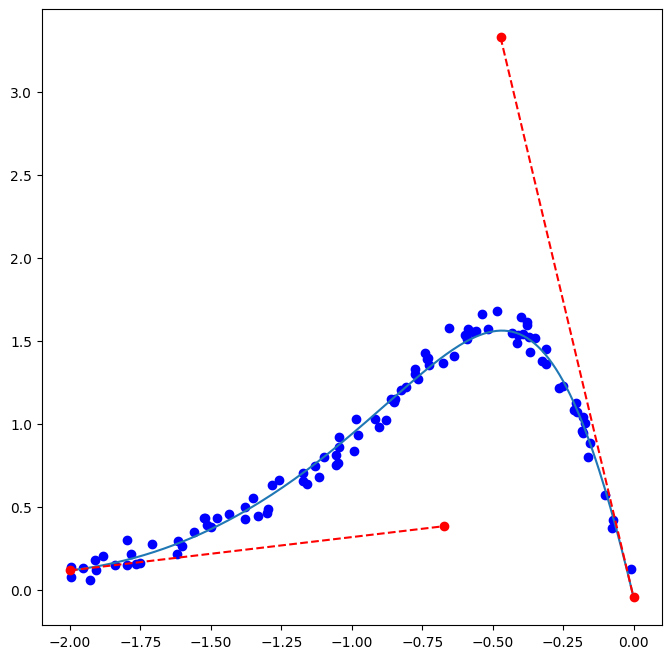

In [7]:
S.plot()
spline.set_chromo(solution)
spline.plot()